In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from statistics import variance

### *Question 1*

In [3]:
rank = list(range(1,14)) 
suits = ['spades', 'hearts', 'clubs', 'diamonds']
card_deck = []
for r in rank:
    for suit in suits:
        card_deck.append({'rank':r, 'suit':suit})

In [4]:
#Inspired from the discussion #2 notebook
def straight_verification(cards):
    """cards as a list of dictionaries"""
    selected_rank = [x['rank'] for x in cards]
    selected_suit = [x['suit'] for x in cards]
    same_suit = len(np.unique(selected_suit)) == 1
    sequential_rank = ((max(selected_rank) - min(selected_rank)) == 4) and (len(np.unique(selected_rank))==5)
    return sequential_rank and not same_suit

def deal(deck):
    return np.random.choice(deck, 5, replace=False)

In [6]:
def simulate(sample_size, deck):
    outcome_straight = 0
    for i in range(sample_size):
        sample_deck = deal(deck)
        if straight_verification(sample_deck):
            outcome_straight += 1
        sample_prob = outcome_straight / sample_size
    return [sample_size, outcome_straight, sample_prob]

probabilities = []
sample_sizes = [1000, 10000, 100000]
for i in sample_sizes:
    probabilities.append(simulate(i, card_deck)[2])
    
pd.DataFrame(list(zip(sample_sizes, probabilities)), columns=['sample size', 'probability'])

,sample size,probability
0,1000,0.00200
1,10000,0.00300
2,100000,0.00383


As you can observe from the table, with increasing sample size, the experimental probability is converging towards the real probability of 0.39%. This real probability can be calculated with combinatorics. We anticipate that in order to achieve an accuracy up to level 0.0001, if our computing power allows, the number of copies of simulation needed is $10^8$.

### *Question 2*
#### *Part a)* *i)*

In [9]:

def fn(lambda_val, sample_size):
    number_arrivals = [] #list to count number of arrivals between 11:55 AM - 12:05 PM
    interval_times = [] #list to count the time between n and n+1 customers
    for a in range(sample_size): #simulating random variables of number of customers 100 times
    
        current_arrivals = 0
        current_time = 0

        while current_time <= 10:

            time_next = np.random.exponential(1/lambda_val)
            interval_times = np.append(interval_times, time_next)
            current_time += time_next

            if current_time <= 10:
                current_arrivals += 1

            else:
                current_time = current_time - time_next
                interval_times = interval_times[0:-1]
                break

        number_arrivals = np.append(number_arrivals, current_arrivals)
    
    avg_sample = np.mean(number_arrivals)
    
    return avg_sample, current_time, number_arrivals, interval_times

answer = fn(2,100)
print('Average number of customers in 10 minutes is {}'.format(answer[0]))
print('Arrivals will happen in {} minutes, which is less than 10, as desired'.format(answer[1]))
print('The sample variance is {}'.format(variance(answer[2])))

Average number of customers in 10 minutes is 19.56
Arrivals will happen in 8.111000190850739 minutes, which is less than 10, as desired
The sample variance is 15.501414141414141


#### *Part a)* *ii)*

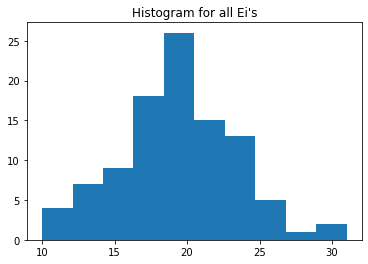

In [10]:
plt.hist(answer[2])
plt.title("Histogram for all Ei's")
plt.show;

#### *Part a)* *iii)*

In [11]:
length = len(answer[3])
print('Number of interval times recorded from the simulation is {}'.format(length))
perc = (sum(answer[3] > 1 )) / length
print('From 100 day simulation, the percentage of inter-arrival times that are longer than 1 minute is {}'.format(perc))
print('Whereas e to the power of -2 is equal to {}'.format(np.exp(-2)))

Number of interval times recorded from the simulation is 1956
From 100 day simulation, the percentage of inter-arrival times that are longer than 1 minute is 0.12372188139059305
Whereas e to the power of -2 is equal to 0.1353352832366127


#### *Part a)* *vi)*

E_1 is equal to 21


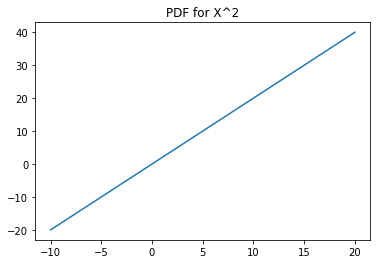

In [13]:
E_1 = int(answer[2][0]) #generating E_1 RV
print('E_1 is equal to {}'.format(E_1))

pdf_hw = lambda x: 2*x #generating PDF for X^2
figure = np.linspace(-10,20,100) #plotting PDF for X^2
plt.plot(figure, [pdf_hw(x) for x in figure])
plt.title('PDF for X^2')
plt.show();

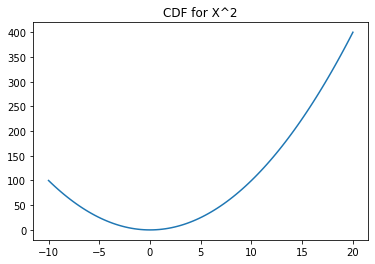

In [14]:
cdf_hw = lambda x: x**2 #generating CDF for X^2

figure = np.linspace(-10,20,100) #plotting PDF for X^2
plt.plot(figure, [cdf_hw(x) for x in figure])
plt.title('CDF for X^2')
plt.show();

<ipython-input-15-bf71151643bb>:1: RuntimeWarning: invalid value encountered in double_scalars
  cdf_inverted = lambda x: (x)**(1/2) #generating inverted version of the CDF


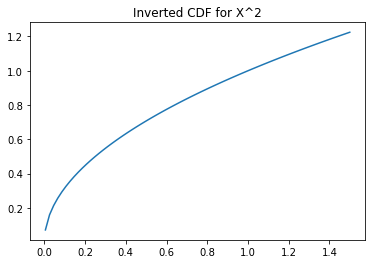

In [15]:
cdf_inverted = lambda x: (x)**(1/2) #generating inverted version of the CDF
figure = np.linspace(-0.5,1.5,100) #plotting inverted CDF for X^2
plt.plot(figure, [cdf_inverted(x) for x in figure])
plt.title('Inverted CDF for X^2')
plt.show();

In [16]:
size_e1 = E_1

In [17]:
U_values = np.random.uniform(size=size_e1)
print(U_values)

[0.24952476 0.59230185 0.35509154 0.88688357 0.72826463 0.9883393
 0.89749788 0.67401072 0.54402731 0.54310767 0.65037883 0.93186961
 0.59338182 0.51815086 0.70721101 0.23461318 0.28975063 0.6295746
 0.66411731 0.73422588 0.77583514]


In [20]:
randomv_list = np.zeros(size_e1)
for i in range(size_e1):
    randomv_list[i] = cdf_inverted(U_values[i])
print(randomv_list)

[0.49952453 0.76961149 0.59589557 0.94174496 0.85338422 0.99415255
 0.94736365 0.82098156 0.73758207 0.73695839 0.80646068 0.96533394
 0.77031281 0.71982697 0.84095839 0.48436885 0.53828489 0.79345737
 0.81493393 0.85686981 0.88081504]


In [21]:
a_value = np.mean(randomv_list)
print("a value: " + str(a_value))

sigma_value = np.std(randomv_list)
print("Sigma value: " + str(sigma_value))

a value: 0.7794676995261514
Sigma value: 0.1429602541302086


In [23]:
sum(randomv_list < a_value + (2 * sigma_value) / (E_1**(1/2)))/ E_1

0.6666666666666666

In [25]:
x = []
for a in range(100):
    x=np.append(x,((np.random.normal(a_value, sigma_value / (E_1**(1/2)))) - a_value) * (E_1**(1/2))/sigma_value)
print(sum(x<2) / len(x))

0.98
